In [27]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [1]:
df = pd.read_csv('/tempo/processed-files/df.csv')
embeddings = np.load('/tempo/processed-files/embeddings.npy')
conv = np.load('/tempo/processed-files/conversion.npy')
conv_dict = {}
for i in range(len(conv)):
    conv_dict[int(conv[i][0])] = conv[i][1]

NameError: name 'pd' is not defined

In [48]:
labels = df['Relation'].to_numpy()
unified_conv_labels = {
    0:0, 2:2, 3:2, 4:2, 5:2, 6:2, 7:7, 8:7, 9:7, 10:10, 11:10, 12:10, 13:10, 15:0, 17:17, 19:17, 20:20, 21:21, 22:21, 23:23, 24:23, 25:23, 27:27, 28:27, 29:27, 30:27, 31:27
    }
# get keys with a value of 0
BROADER = np.array([k for k, v in unified_conv_labels.items() if v == 0])
EVALUATES = np.array([k for k, v in unified_conv_labels.items() if v == 2])
IMPROVES = np.array([k for k, v in unified_conv_labels.items() if v == 7])
INCLUDES = np.array([k for k, v in unified_conv_labels.items() if v == 10])
PREDICTS = np.array([k for k, v in unified_conv_labels.items() if v == 17])
PROVIDES = np.array([k for k, v in unified_conv_labels.items() if v == 20])
REQUIRES = np.array([k for k, v in unified_conv_labels.items() if v == 21])
SUPPORTS = np.array([k for k, v in unified_conv_labels.items() if v == 23])
USES = np.array([k for k, v in unified_conv_labels.items() if v == 27])

# convert np array labels to unified labels using map
unified_labels = np.array([unified_conv_labels[label] for label in labels])
new_labels = np.empty(len(unified_labels), dtype=object)

In [17]:
new_dimension = 70
pca = PCA(n_components=new_dimension)
transformed = pca.fit_transform(embeddings)

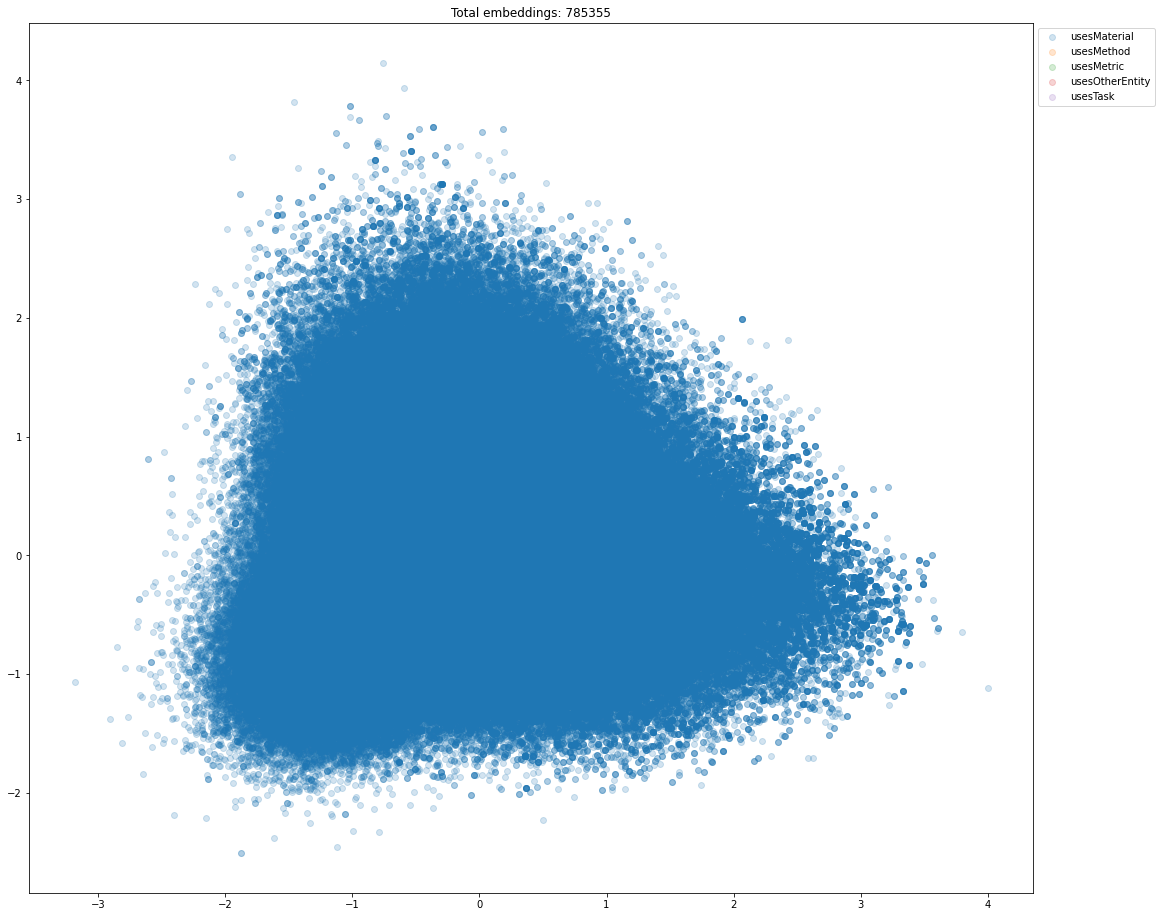

In [85]:
plt.rcParams['figure.figsize'] = [18,16]

# visualize the top 3 principal components on a 3D plot
fig, ax = plt.subplots()

selected_relational_groups = np.concatenate((USES,), axis=0)

total = 0
for i in selected_relational_groups:
    selected_labels = np.where(unified_labels[:len(transformed)] == int(i))
    total += len(selected_labels[0])
    ax.scatter(
        transformed[selected_labels, 0],
         transformed[selected_labels, 1],
            alpha=0.2, label=conv_dict[i])

    # title the graph
    ax.set_title(f'Total embeddings: {total}')

# put the legend outside of the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [87]:
n = 40_000

selected_indexes = []
for i in selected_relational_groups:
    selected_labels = np.where(unified_labels[:len(transformed)] == int(i))
    selected_indexes.extend(selected_labels[0])

selected_indexes = np.array(selected_indexes)
selected_embeddings = transformed[selected_indexes]

# get the best k for kmeans
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(selected_embeddings)
    score = silhouette_score(selected_embeddings[:n], kmeans.labels_[:n])
    print(f'k: {k}, score: {score}')

k: 2, score: 0.05784863233566284
k: 3, score: 0.05141770467162132
k: 4, score: 0.043947599828243256
k: 5, score: 0.040069591253995895


Text(0.5, 1.0, 'Total embeddings: 785355')

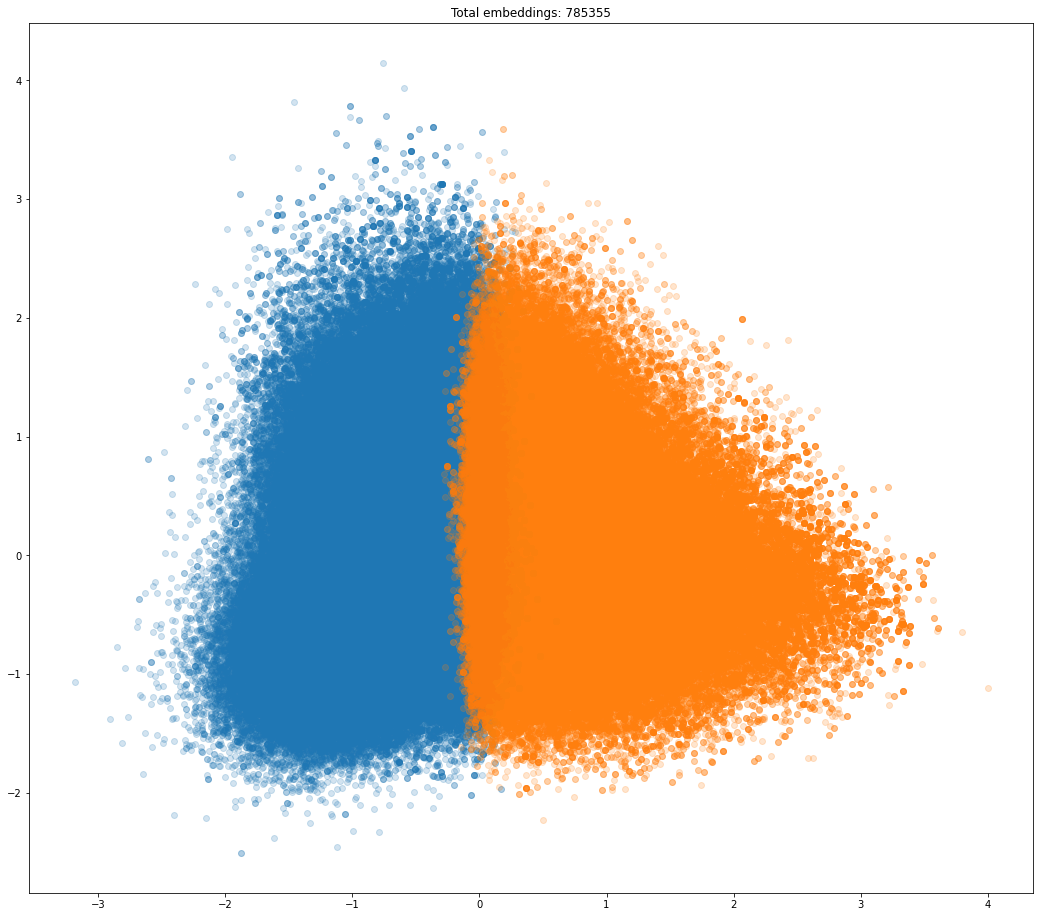

In [88]:
# relabel the embeddings with the best k

group = 'USES'
best_k = 2

kmeans = KMeans(n_clusters=best_k, random_state=0).fit(selected_embeddings)
new_labels[selected_indexes] = [f'{group} {label}' for label in kmeans.labels_]
fig, ax = plt.subplots()
total = 0
for i in range(best_k):
    selected_labels = np.where(kmeans.labels_ == i)
    total += len(selected_labels[0])
    ax.scatter(
        selected_embeddings[selected_labels, 0],
        selected_embeddings[selected_labels, 1],
        alpha=0.2, label=f'{group} {i}')

# title the graph
ax.set_title(f'Total embeddings: {total}')

In [103]:
print(set(new_labels))

# count the number of None labels
print(f'None labels: {len(np.where(new_labels == None)[0])}')

{'PREDICTS 0', 'SUPPORTS 0', 'INCLUDES 3', 'INCLUDES 2', 'EVALUATES 1', 'INCLUDES 0', 'SUPPORTS 2', 'PROVIDES 0', 'IMPROVES 2', 'SUPPORTS 1', 'USES 1', 'INCLUDES 1', 'IMPROVES 0', 'BROADER 0', 'EVALUATES 0', 'USES 0', 'BROADER 1', 'IMPROVES 1', 'REQUIRES 0'}
None labels: 0


In [102]:
# Manually adding the small groups
selected_indexes = []
for i in PREDICTS:
    selected_labels = np.where(unified_labels[:len(transformed)] == int(i))
    selected_indexes.extend(selected_labels[0])

new_labels[selected_indexes] = 'PREDICTS 0'